In [4]:
import pandas as pd
import urllib.request, json 
import time

API_key = 'ZJOZCVCA9DRZ9BL'

currencies = ['USD', 'EUR', 'GBP', 'YEN']
headers = ['open','high','low','close']

for i in range(0,len(currencies)):
    for j in range(1,len(currencies)):
        print(currencies[i])
        print(currencies[j])
        url = "https://www.alphavantage.co/query?function=FX_DAILY&from_symbol={currency1}&to_symbol={currency2}&outputsize=full&apikey={key}"
        url = url.format(currency1 = currencies[i], currency2 = currencies[j],  key = API_key)
        
        # symb_name = "{symbol}.csv"
        # symb_name = symb_name.format(symbol = row['Symbol'])
        
        with urllib.request.urlopen(url) as news:
            data = json.loads(news.read().decode())
        data = data['Time Series FX (Daily)']
        data = pd.DataFrame(data)
        data = data.T
        data.columns = headers
        
        #data['date'] = data.index
        #print(data)
        #data.to_csv(symb_name)
        time.sleep(10)
print(data)

USD
EUR
USD
GBP


KeyboardInterrupt: 

In [26]:
labels = data.shift(-1)
X_tr = (data.values)[::-1]
Y_tr = (labels.values)[::-1]
X_tr = X_tr[3000:4959,0]
Y_tr = Y_tr[3000:4959,0]
print(X_tr.size)
print(Y_tr.size)

1959
1959


In [23]:
data1 = data.shift(-1)
print(data1)

              open     high      low   close       adjusted    volume  \
2021-04-09  284.12  285.345   283.23  284.42         284.42   1600609   
2021-04-08  281.97   283.63    281.1  282.57         282.57   2736294   
2021-04-07  281.43   283.05   279.65  281.63         281.63   1786624   
2021-04-06  279.01   282.69    278.8  281.13         281.13   2631275   
2021-04-05  278.62   278.78  276.065  278.34         278.34   2301965   
...            ...      ...      ...     ...            ...       ...   
2001-07-25   14.95    14.97     14.7   14.86  10.9780371958   3537300   
2001-07-24    15.0    15.01    14.55    15.0  11.0814641949   7501000   
2001-07-23   15.05    15.05     14.8   15.01  11.0888518377   9238500   
2001-07-20    15.1    15.29     15.0   15.17  11.2070541225  34994300   
2001-07-19     NaN      NaN      NaN     NaN            NaN       NaN   

           dividend split  
2021-04-09   0.0000   1.0  
2021-04-08   0.0000   1.0  
2021-04-07   0.0000   1.0  
2021-04-06 

In [16]:
from numpy import array
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense
# define model
n_steps = 20
n_features = 1

model = Sequential()
model.add(LSTM(50, activation='relu', return_sequences=True, input_shape=(n_steps, n_features)))
model.add(LSTM(50, activation='relu'))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

In [17]:
# split a univariate sequence
def split_sequence(sequence, n_steps):
	X, y = list(), list()
	for i in range(len(sequence)):
		# find the end of this pattern
		end_ix = i + n_steps
		# check if we are beyond the sequence
		if end_ix > len(sequence)-1:
			break
		# gather input and output parts of the pattern
		seq_x, seq_y = sequence[i:end_ix], sequence[end_ix]
		X.append(seq_x)
		y.append(seq_y)
	return array(X), array(y)
 
# define input sequence
raw_seq = X_tr
print(raw_seq)
# split into samples
X, y = split_sequence(raw_seq, n_steps)
# reshape from [samples, timesteps] into [samples, timesteps, features]
n_features = 1
X = X.reshape((X.shape[0], X.shape[1], n_features))
# define model
model = Sequential()
model.add(LSTM(50, activation='relu', return_sequences=True, input_shape=(n_steps, n_features)))
model.add(LSTM(50, activation='relu'))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')
# fit model
model.fit(X, y, epochs=200, verbose=0)
# demonstrate prediction
x_input = X_tr[-20:]
x_input = x_input.reshape((1, n_steps, n_features))
yhat = model.predict(x_input, verbose=0)
print(yhat)

['80.05' '80.48' '80.22' ... '278.62' '279.01' '281.43']
[[279.38153]]


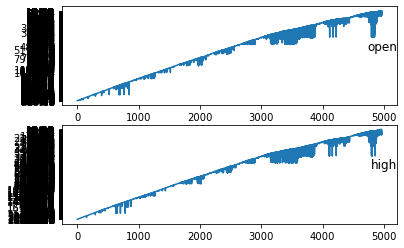

In [13]:
from matplotlib import pyplot
# load dataset
values = X_train
# specify columns to plot
groups = [0, 1]
i = 1
# plot each column
pyplot.figure()
for group in groups:
	pyplot.subplot(len(groups), 1, i)
	pyplot.plot(values[:, group])
	pyplot.title(data.columns[group], y=0.5, loc='right')
	i += 1
pyplot.show()